In [1]:
from google.oauth2 import service_account
from google.cloud import bigquery
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import font_manager,rc

plt.rc("font", family = "Malgun gothic")

In [2]:
credentials = service_account.Credentials.from_service_account_file("./teamproject_key.json")

In [3]:
client = bigquery.Client(
    credentials = credentials,
    project = credentials.project_id
)

In [4]:
pp = """
WITH avg_total AS (
    SELECT
        FORMAT_DATE('%Y', `teamproject-428905.kim.public_transportation_city`.`연도`) AS `연도`,
        (`teamproject-428905.kim.public_transportation_city`.`서울_전체` / `teamproject-428905.kim.population_city`.`서울특별시`) * 100 AS `서울`,
        (`teamproject-428905.kim.public_transportation_city`.`부산_전체` / `teamproject-428905.kim.population_city`.`부산광역시`) * 100 AS `부산`,
        (`teamproject-428905.kim.public_transportation_city`.`대구_전체` / `teamproject-428905.kim.population_city`.`대구광역시`) * 100 AS `대구`,
        (`teamproject-428905.kim.public_transportation_city`.`인천_전체` / `teamproject-428905.kim.population_city`.`인천광역시`) * 100 AS `인천`,
        (`teamproject-428905.kim.public_transportation_city`.`광주_전체` / `teamproject-428905.kim.population_city`.`광주광역시`) * 100 AS `광주`,
        (`teamproject-428905.kim.public_transportation_city`.`대전_전체` / `teamproject-428905.kim.population_city`.`대전광역시`) * 100 AS `대전`,
        (`teamproject-428905.kim.public_transportation_city`.`울산_전체` / `teamproject-428905.kim.population_city`.`울산광역시`) * 100 AS `울산`,
        (`teamproject-428905.kim.public_transportation_city`.`세종_전체` / `teamproject-428905.kim.population_city`.`세종특별자치시`) * 100 AS `세종`,
        (`teamproject-428905.kim.public_transportation_city`.`경기도_전체` / `teamproject-428905.kim.population_city`.`경기도`) * 100 AS `경기`,
        (`teamproject-428905.kim.public_transportation_city`.`강원도_전체` / `teamproject-428905.kim.population_city`.`강원특별자치도`) * 100 AS `강원`,
        (`teamproject-428905.kim.public_transportation_city`.`충청북도_전체` / `teamproject-428905.kim.population_city`.`충청북도`) * 100 AS `충북`,
        (`teamproject-428905.kim.public_transportation_city`.`충청남도_전체` / `teamproject-428905.kim.population_city`.`충청남도`) * 100 AS `충남`,
        (`teamproject-428905.kim.public_transportation_city`.`전라북도_전체` / `teamproject-428905.kim.population_city`.`전북특별자치도`) * 100 AS `전북`,
        (`teamproject-428905.kim.public_transportation_city`.`전라남도_전체` / `teamproject-428905.kim.population_city`.`전라남도`) * 100 AS `전남`,
        (`teamproject-428905.kim.public_transportation_city`.`경상북도_전체` / `teamproject-428905.kim.population_city`.`경상북도`) * 100 AS `경북`,
        (`teamproject-428905.kim.public_transportation_city`.`경상남도_전체` / `teamproject-428905.kim.population_city`.`경상남도`) * 100 AS `경남`,
        (`teamproject-428905.kim.public_transportation_city`.`제주_전체` / `teamproject-428905.kim.population_city`.`제주특별자치도`) * 100 AS `제주`
    FROM
        `teamproject-428905.kim.public_transportation_city`
    JOIN
        `teamproject-428905.kim.population_city`
    ON
        `teamproject-428905.kim.public_transportation_city`.`연도` = `teamproject-428905.kim.population_city`.`연도`
)
SELECT
	AVG(`서울`) AS `서울`,
    AVG(`부산`) AS `부산`,
    AVG(`대구`) AS `대구`,
    AVG(`인천`) AS `인천`,
    AVG(`광주`) AS `광주`,
    AVG(`대전`) AS `대전`,
    AVG(`울산`) AS `울산`,
    AVG(`세종`) AS `세종`,
    AVG(`경기`) AS `경기`,
    AVG(`강원`) AS `강원`,
    AVG(`충북`) AS `충북`,
    AVG(`충남`) AS `충남`,
    AVG(`전북`) AS `전북`,
    AVG(`전남`) AS `전남`,
    AVG(`경북`) AS `경북`,
    AVG(`경남`) AS `경남`,
    AVG(`제주`) AS `제주`
FROM
	avg_total
"""

In [5]:
pp_df = client.query(pp).to_dataframe()

C:\Users\rlawn\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [6]:
pp_df = pp_df.transpose()

In [7]:
pp_df.columns = ['avg']

In [48]:
pp_df = pp_df.sort_values(by = "avg", ascending = False)

In [8]:
pp_df

,avg
서울,42.569683
부산,27.676034
대구,19.177302
인천,24.495018
광주,13.897160
대전,15.962387
울산,11.604745
세종,6.824586
경기,21.400081
강원,5.510436


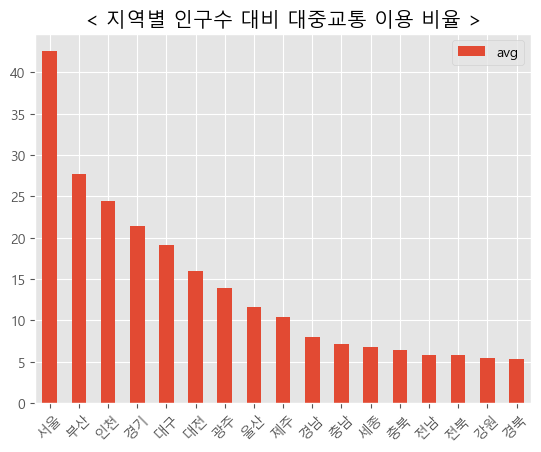

In [51]:
plt.style.use('ggplot')
pp_df.plot(kind = "bar")
plt.title("< 지역별 인구수 대비 대중교통 이용 비율 >")
_ = plt.xticks(rotation=45)